## Attention机制

**Attention机制：**Decoder层会将输入的Encoder隐藏层进行softmax计算，然后加权求和，与Decoder输入拼接。这样做的好处是可以将Decoder的每一个时间步都利用与该时间步最相关的Encoder编码信息，这样可以更好地学习到两种语言中对应位置单词的关系。

![seq2seq](./images/seq2seq.svg)
<div align=center>不含Attention机制，Encoder输出隐藏层最后一层向量</div>  


![seq2seq——attention](./images/seq2seq_attention.png)
<div align=center>Attention机制，Encoder输出隐藏层所有时间步向量</div>

## Transformer

要点：
- Self Attention
- Multi-Head Attention
- Positional Embedding
- Add & Layer Normalization
- Encoder and Decoder

相比于seq2seq-Attention，transformer的优势：
* self Attention 取代LSTM，可以实现并发；而且同时处理上下文信息
* 增加了Q,K,V 参数矩阵，使模型具有更强大的表现力
* Multi-Head Attention，并发且可以采集到不同特征

![illustrated transformer](./images/transformer-illustrated.png)

### Encoder 数据流

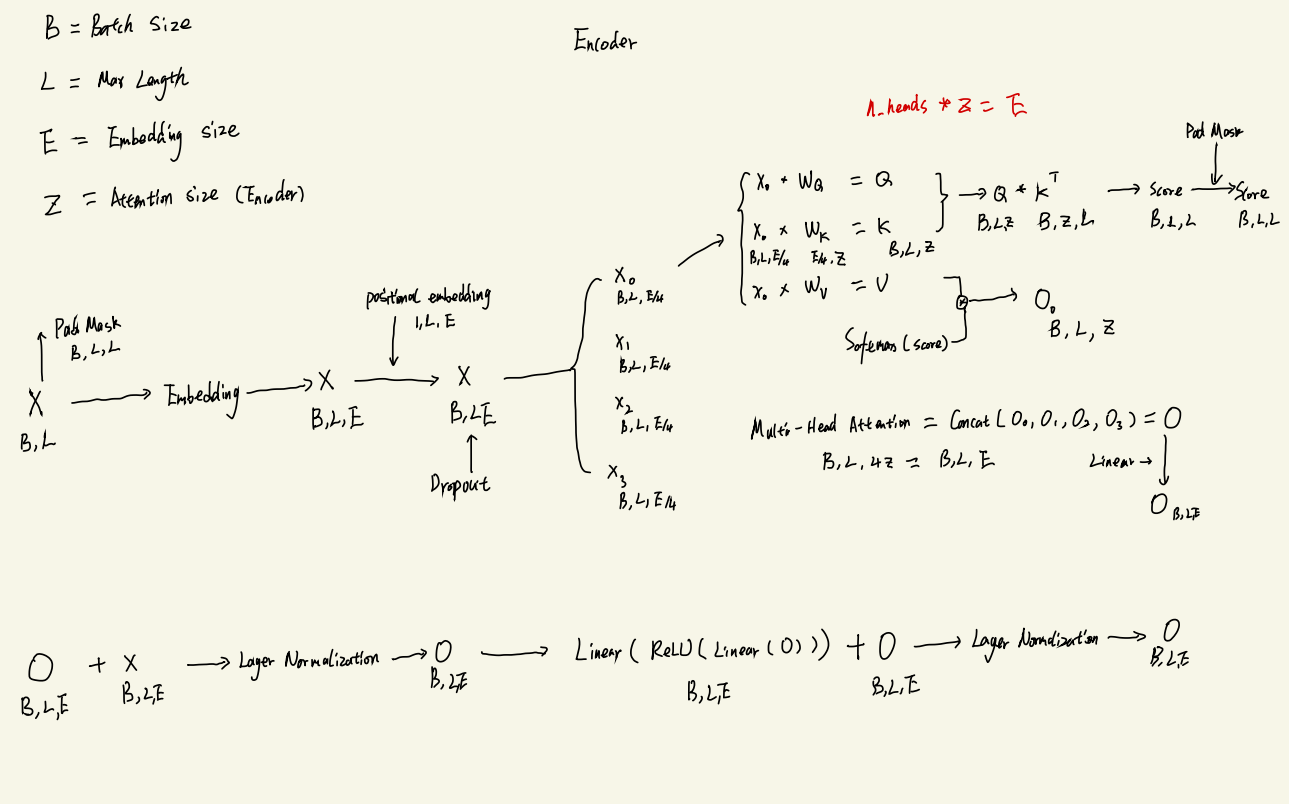

### Decoder数据流

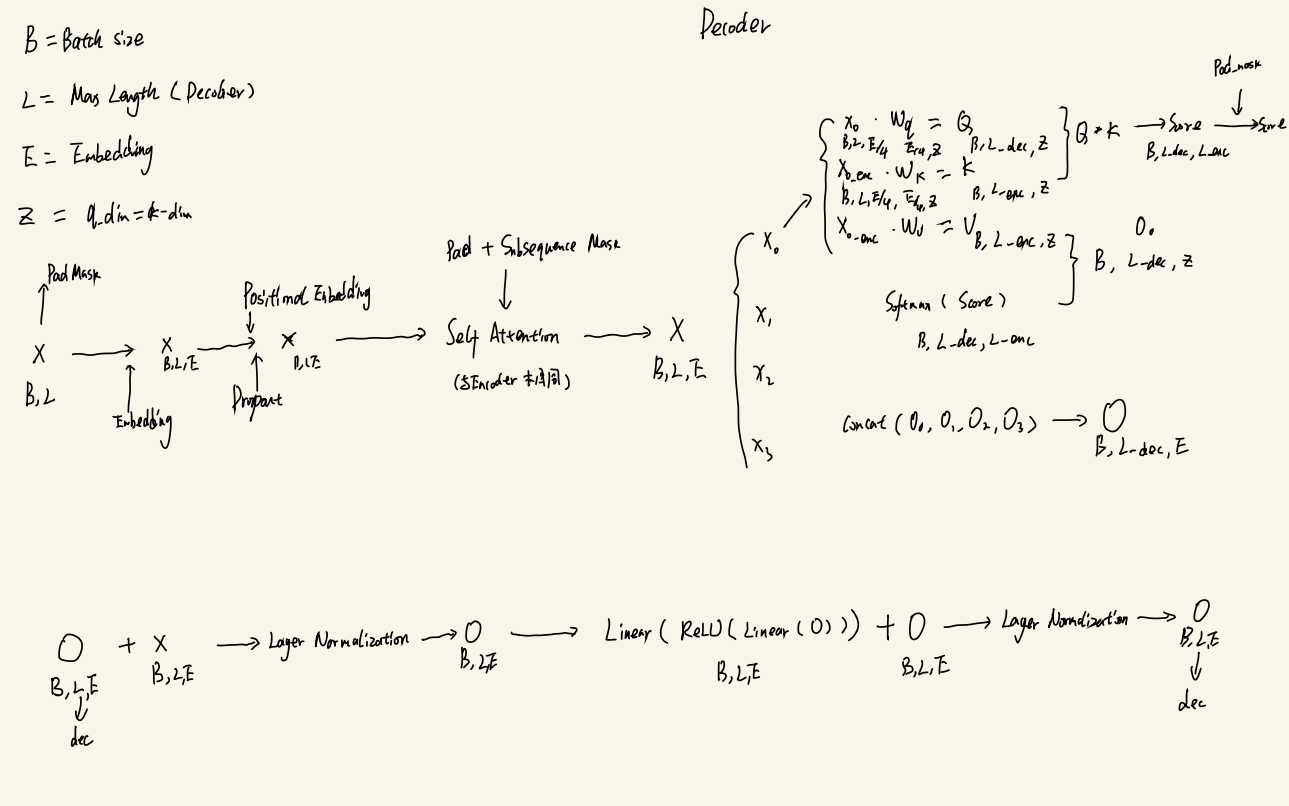

### Transformer代码实现--手动编写Layer
* 生成测试数据
* 初始化超参数
* 初始化模型
* 模型训练
* 预测-BeamSearch  
[代码链接](./Task2-Pytorch_Transformer_with_Custom_Layer.ipynb)

## Transformer问答

### Self-Attention相比于seq2seq的Attention有哪些优点？

* 1. Self-Attention 可以并行化，不存在时序的限制（RNN）
* 2. Self-Attention的Encoder可以同时关注到上下文信息，而attention只能看到上文信息
* 3. Self—Attention在计算过程中会直接将句子中任意两个单词直接联系起来，更容易捕获句子中长距离的依赖特征

### Transformer中的softmax计算为什么需要除以$\sqrt{d_k}$?

随着k_dim的增长，点积模型的值通常有比较大的方差，即存在部分值很大/很小的极端情况；而softmax对于值之间的相对大小有很强的放大作用。所以为了避免进入softmax饱和区，要对点积模型进行缩放。

### Transformer中attention score计算时候如何mask掉padding位置?

会生成一个与attention score大小一致的pad_mask矩阵（0/1）  
softmax运算前，会将attention score与pad_mask值为零对应的位置赋予一个极小负数，这样，在softmax运算时，该值会趋近于零。

### 为什么Transformer中加入了positional embedding？

由于 Transformer 模型没有循环神经网络的迭代操作，所以我们必须提供每个字的位置信息给 Transformer，这样它才能识别出语言中的顺序关系.
* 位置编码应该为每个字输出唯一的编码
* 不同长度的句子之间，任何两个字之间的差值应该保持一致

### Encoder和Decoder中参数有哪些是一致的？哪些可能不一致？

一致的参数：
* Batch_size
* Embedding_size
* k_dim=q_dim
* n_heads
* q_dim


不一致的参数：
* max_sequence_length

### Multi-Head Attention 在计算时还是按一个大矩阵计算，跟不是多头有什么区别？优势在哪里？

由于Embedding会按n_heads进行均匀划分，在计算的时候仍然是一个大矩阵（所有头）进行计算，但是在计算Attention的时候是按照小区间进行计算的，
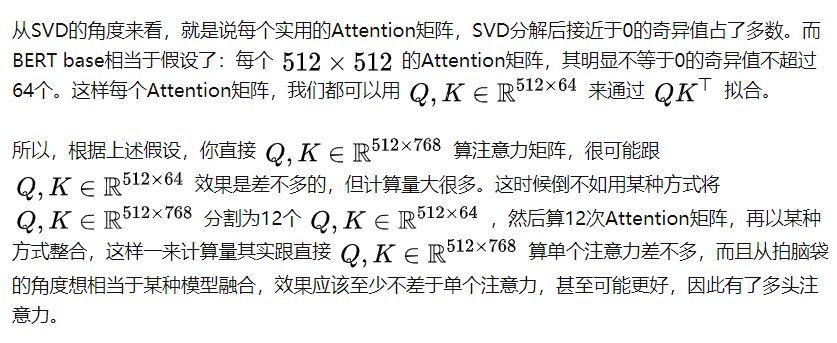


### Layer Normalization 相比 Batch Normalization的优点是？

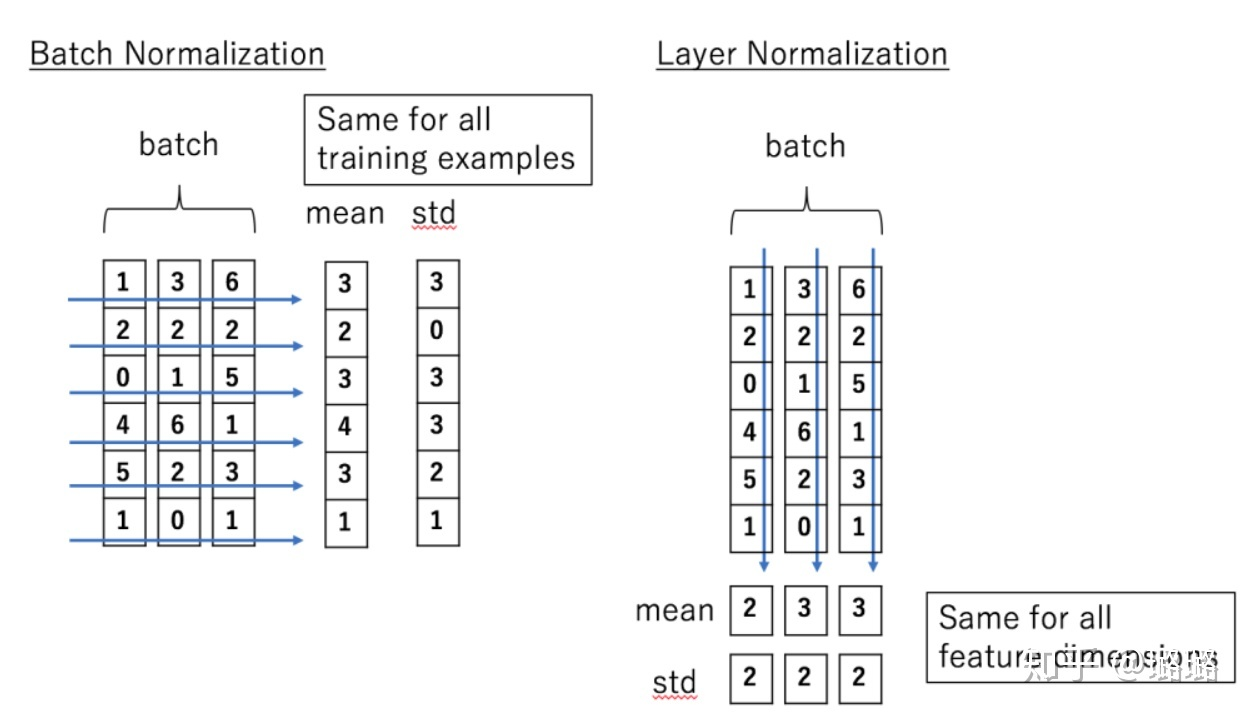

BN、LN可以看作横向和纵向的区别。
经过归一化再输入激活函数，得到的值大部分会落入非线性函数的线性区，导数远离导数饱和区，避免了梯度消失，这样来加速训练收敛过程。

LayerNorm这类归一化技术，目的就是让每一层的分布稳定下来，让后面的层可以在前面层的基础上安心学习知识。

BatchNorm就是通过对batch size这个维度归一化来让分布稳定下来。LayerNorm则是通过对Hidden size这个维度归一。

### 残差连接的优势是什么？是为了解决什么问题？

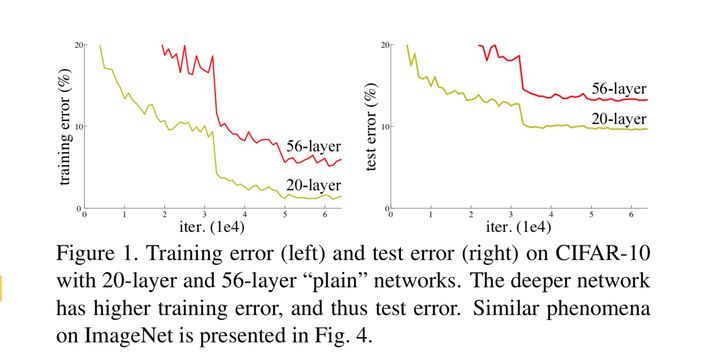
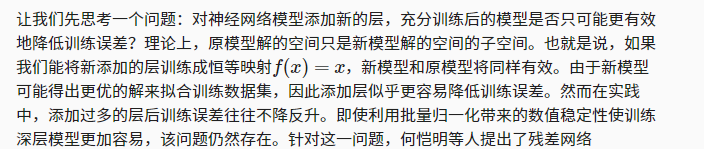

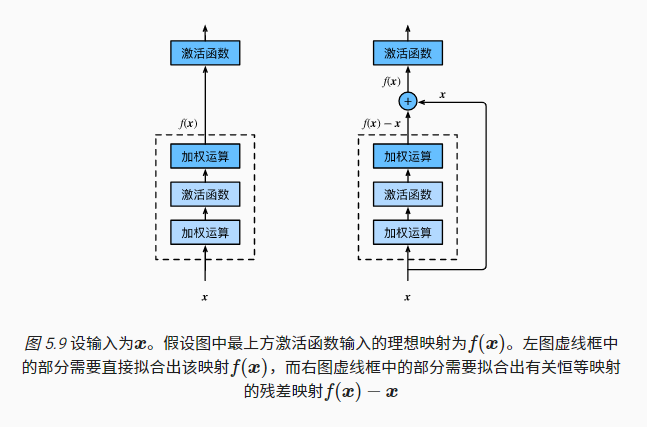